In [ ]:
! pip install importlib-metadata==4.13.0
! pip install xarray==0.20.1

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.1
    Uninstalling importlib-metadata-7.0.1:
      Successfully uninstalled importlib-metadata-7.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.7/835.7 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires xarray>=0.21.0, but you have xarray 0.20.1 which is incompatible.
xarray-einstats 0.7.0 requires xarray>=2022.09.0, but you have xarray 0.20.1 which is incompatible.


In [ ]:
! pip install --upgrade xarray zarr gcsfs cftime nc-time-axis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 19.6 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5033 sha256=2767886ed5142c1a79b5142d80cf832dc936905728a1289150131d75da1bef35
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
  Attempting uninstall: xarray
    Found existing installation: xarray 0.20.1
    Uninstalling xarray-0.

In [ ]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.6 MB/s eta 0:00:00


In [ ]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import xarray as xr
import sys
#import netCDF4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# plotting parameters
color_list = ['#000000', '#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#D55E00', '#CC79A7'] * 2
marker_list = ['o', 's', 'P', '+', 'D', 'v', '3', 'm'] * 2
markersize = 6
linewidth = 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
cdds_params={'axes.linewidth': 3,
 'axes.axisbelow': False,
 'axes.edgecolor': 'black',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'axes.titlesize': 20,
 'axes.labelsize': 20,
 'axes.titlelocation': 'left',
 'figure.facecolor': 'white',
 'figure.figsize': (18, 10),
 'lines.solid_capstyle': 'round',
 'lines.linewidth': 2.5,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'legend.frameon': False,
 'xtick.bottom': True,
 'xtick.major.width': 3,
 'xtick.major.size': 6,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False,
 'ytick.color' : 'black',
 'ytick.major.width': 3,
 'ytick.major.size': 6,
 'axes.prop_cycle': plt.cycler(color=color_list),
 'font.size': 16,
 'font.family': 'serif'}
plt.rcParams.update(cdds_params)

Load data

In [ ]:
ds=xr.open_dataset('/content/drive/MyDrive/global_data_processed_precip.nc')
ds.load()


<xarray.Dataset> Size: 647kB
Dimensions:  (model: 26, time: 2988)
Coordinates:
  * model    (model) <U16 2kB 'CanESM5' 'AWI-CM-1-1-MR' ... 'NorESM2-MM'
  * time     (time) datetime64[ns] 24kB 1851-01-31 1851-02-28 ... 2099-12-31
Data variables:
    pr       (model, time) float64 622kB 3.292e-05 3.256e-05 ... 3.435e-05

Load weights

In [ ]:
weights_save  = xr.open_dataarray('weights_precip.nc')
weights_save.load()

<xarray.DataArray 'weights' (pseudo_dropped: 26, models: 25)> Size: 5kB
array([[9.33066728e-02, 1.02385803e-01, 2.59416277e-03, 3.46536614e-08,
        1.80114070e-01, 1.65705087e-09, 4.11899377e-02, 5.71212736e-02,
        2.62245853e-05, 9.35701867e-14, 3.87020956e-02, 8.62615595e-03,
        1.82153042e-01, 5.90211950e-17, 4.61200647e-08, 3.42118283e-15,
        1.91497262e-17, 3.05826565e-06, 3.40162107e-05, 1.91187962e-40,
        8.39183894e-11, 9.57865188e-02, 1.14682593e-01, 8.32742939e-02,
        1.48814360e-28],
       [4.66306856e-02, 8.49198802e-04, 1.03297214e-02, 1.18186048e-09,
        1.56542805e-02, 9.76650643e-12, 1.48651809e-01, 1.77403686e-01,
        2.43346045e-05, 1.08780573e-18, 1.42884501e-01, 3.88796613e-02,
        1.72112140e-02, 8.42949736e-42, 1.84391171e-09, 4.20209494e-21,
        6.26604254e-25, 1.52087622e-16, 3.51648906e-05, 1.13676197e-65,
        8.02231983e-14, 2.00805484e-01, 1.37115676e-03, 1.99269099e-01,
        2.47384016e-44],
       [1.60039855e-01, 1.77613923e-02, 5.47021979e-05, 1.96766198e-11,
        2.34396692e-01, 4.44136372e-13, 3.94606174e-03, 7.00500263e-03,
        9.89354144e-08, 2.97840237e-18, 3.54753932e-03, 3.23598613e-04,
        2.28896425e-01, 2.18623755e-13, 2.81864353e-11, 5.67557849e-20,
        1.20326191e-22, 4.01042709e-04, 1.39704088e-07, 3.86566842e-49,
        1.12911468e-14, 1.87323689e-02, 3.10723843e-01, 1.41712372e-02,
...
        1.14233856e-11, 2.37316839e-01, 2.23418291e-13, 4.11447692e-03,
        7.36327406e-03, 7.76220072e-08, 9.33006725e-19, 3.69278178e-03,
        3.21153406e-04, 2.32257605e-01, 1.96928904e-14, 1.65836099e-11,
        1.51011789e-20, 2.47331443e-23, 1.75173324e-04, 1.10859172e-07,
        5.24236801e-51, 4.92455736e-15, 1.98768005e-02, 1.50070940e-02,
        7.90447148e-37],
       [3.29997836e-02, 1.97035852e-01, 3.73754117e-04, 1.16554846e-02,
        7.90468805e-10, 9.58268735e-03, 5.30160173e-12, 1.58904312e-01,
        1.84711807e-01, 2.37924030e-05, 2.77521673e-19, 1.53377467e-01,
        4.38911206e-02, 1.06614686e-02, 3.26363494e-45, 1.25661000e-09,
        8.13750011e-22, 7.76182790e-26, 5.10328607e-18, 3.47890468e-05,
        8.46861898e-69, 3.49939892e-14, 1.96112632e-01, 6.35047423e-04,
        2.83923249e-46],
       [2.23353967e-06, 2.77187990e-05, 1.63469107e-07, 6.09825366e-04,
        2.20600701e-02, 9.33843210e-07, 3.81300409e-02, 7.90846589e-05,
        5.47441151e-05, 4.14878638e-03, 1.30654650e-01, 8.43728018e-05,
        2.92196926e-04, 9.99774518e-07, 1.68338700e-17, 2.08377304e-02,
        1.74297785e-01, 2.49305750e-01, 8.20824243e-12, 3.80961001e-03,
        2.95811927e-01, 5.97315372e-02, 2.65555458e-05, 2.10582114e-07,
        3.30730703e-05]])
Dimensions without coordinates: pseudo_dropped, models

## Remove Seasonal Cycle

Removing seasonal variablilty, so we can use a dataset with just anomolies


In [ ]:
def remove_time_mean(x):
    return x - x.mean(dim='time')

ds = ds.groupby('time.month').apply(remove_time_mean)
ds

<xarray.Dataset> Size: 647kB
Dimensions:  (model: 26, time: 2988)
Coordinates:
  * model    (model) <U16 2kB 'CanESM5' 'AWI-CM-1-1-MR' ... 'NorESM2-MM'
  * time     (time) datetime64[ns] 24kB 1851-01-31 1851-02-28 ... 2099-12-31
Data variables:
    pr       (model, time) float64 622kB -9.814e-07 -1.007e-06 ... 1.386e-06

In [ ]:
pseudo = ds.pr[20].sel(time=slice('2020', '2099')).values - ds.pr[20].sel(time=slice('1960', '2014')).mean(dim='time').values

all = ds.pr.sel(time=slice('2020', '2099')).values - ds.pr.sel(time=slice('1960', '2014')).mean(dim='time').values[:, None]

In [ ]:
W=list()
RMSE=list()
UW=list()


#select the pseudo's weights
weights=weights_save[20,:]

#select pseudo
ds_obs=ds.isel(model=20)

#select everything but pseudo
v=np.delete(np.arange(26), 20)
ds_gcm=ds.isel(model=v)

#apply weights
weights = xr.DataArray(weights_save[20,:], dims=["model"])

ds_gcm_weighted = (ds_gcm.pr * weights).sum(dim="model")

ds_gcm_weighted = ds_gcm_weighted.sel(time=slice('2020', '2099')).values - ds_gcm_weighted.sel(time=slice('1960', '2014')).mean(dim='time').values

In [ ]:
#select time period for plotting
years = ds.time.sel(time=slice('2020', '2100')).values
years = years.astype('datetime64[Y]')

smaller = np.arange(0, len(years), 120)
if smaller[-1] != len(years) - 1:
    smaller = np.append(smaller, len(years) - 1)

selected_years = [years[i] for i in smaller]



##Figure 1c: Models with unweighted mean, weighted mean, and pseudo observation between 1980-2099


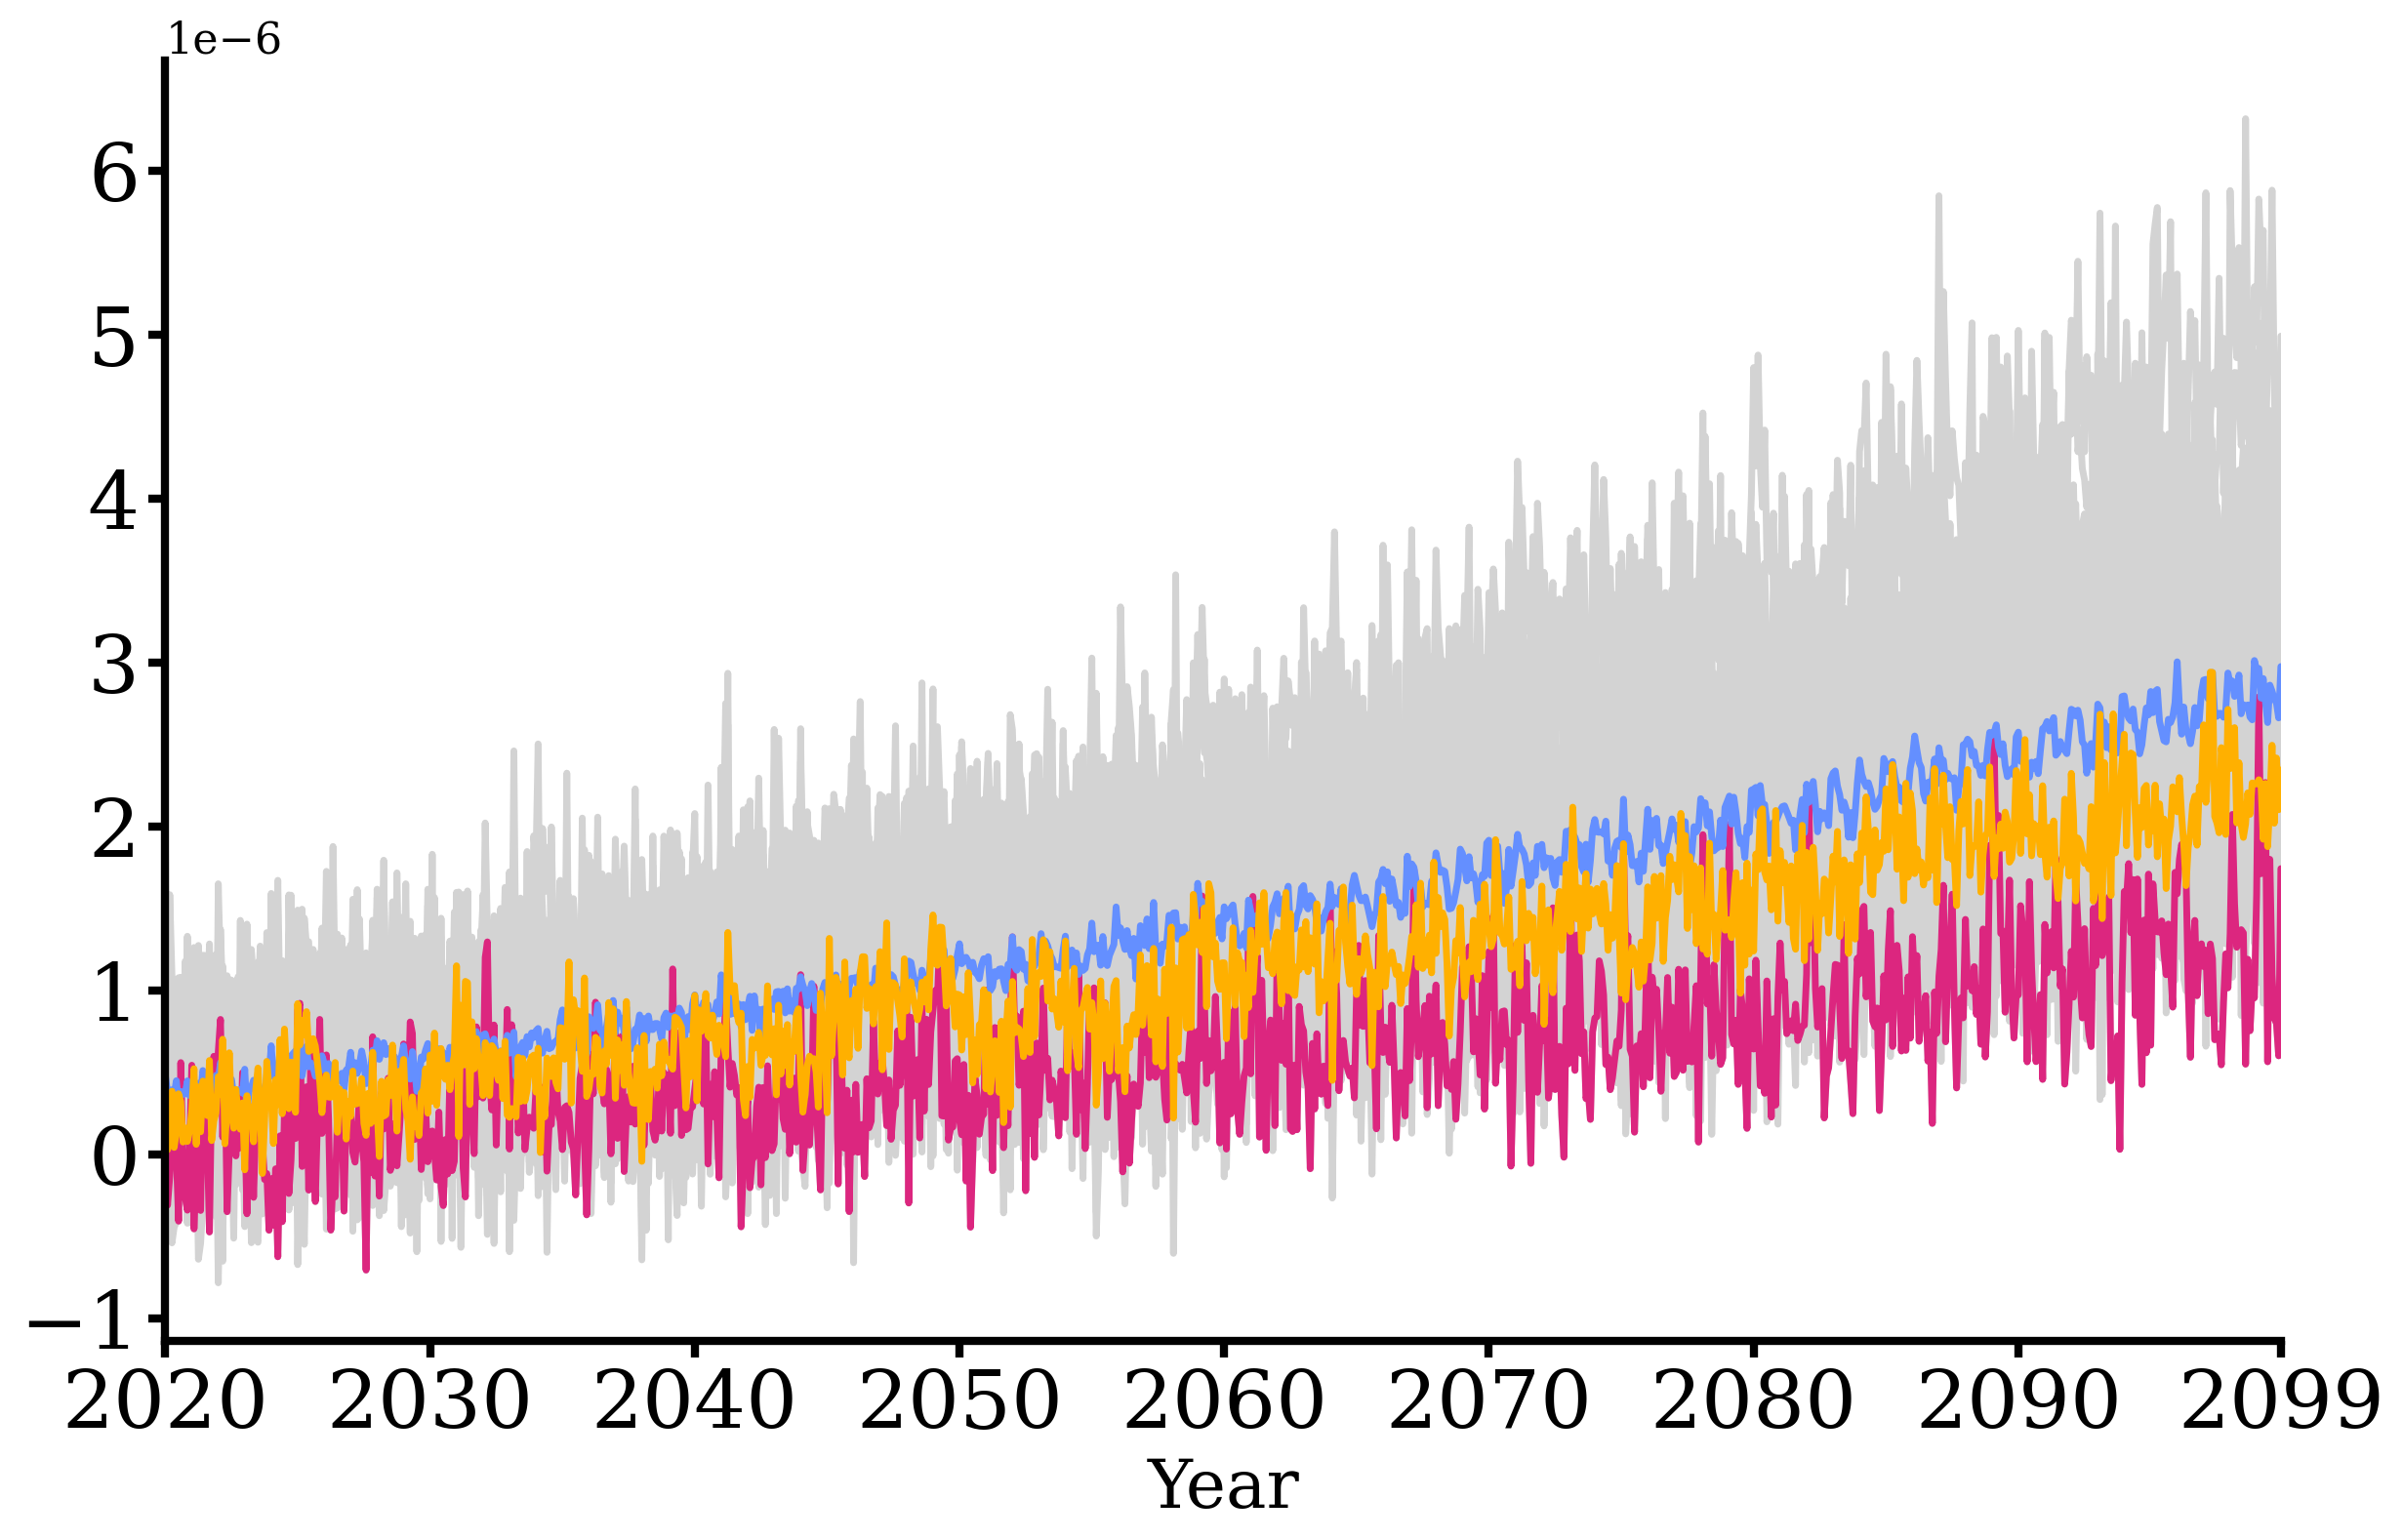

In [ ]:

fig, ax = plt.subplots(figsize=(12, 8))

#plot overall time period, weighted mean, unweighted mean, psuedo-obs, and trendline
for i in range(len(ds.pr.model)) :
  ax.plot(all[i], color='lightgray', linestyle='-')

#plot pseudo-observation in red (first model chosen for the example)
ax.plot(pseudo, color='#DC267F', label='pseudo-observation', linestyle='-')
#plot unweighted mean in blue
ax.plot(all.mean(axis=0), label="unweighted mean", color='#648FFF', linestyle='-')
#plot weighted mean in yellow
ax.plot(ds_gcm_weighted, label="weighted mean", color='#FFB000', linestyle='-')
#labels
plt.xlabel("Year", fontsize = 25)
# plt.ylabel("Precipitation Change (kg m$^{-2}$ s$^{-1}$)", fontsize = 25)


plt.tight_layout()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


ax.set_xlim(0, 660)

ax.set_xticks(smaller)
ax.set_xticklabels(selected_years)

# ax.legend(fontsize = 30)
plt.savefig('example_precip.png')